# LAB 8

In [5]:
# 1 # ΠΡΟΣΕΓΓΥΣΗ ΣΥΝΑΡΤΗΣΗΣ ΜΕ ΕΛΑΧΙΣΤΑ ΤΕΤΡΑΓΩΝΑ
import math
filename = 'C:/Users/souli/Downloads/points.txt' #allagi onomatos filename apo edw

def mylog(x):
    return math.log(x)

def myexp(x):
    return math.exp(x)


# Διαβάζει τα δεδομένα από το αρχείο
def read_data(filename):
    with open(filename, 'r') as f:
        n = int(f.readline())
        x = []
        y = []
        for _ in range(n):
            parts = f.readline().split()
            x.append(float(parts[0]))
            y.append(float(parts[1]))
    return x, y

# Γραμμική παλινδρόμηση y = a1 * x + a0
def lsqlin(x, y):
    n = len(x)
    sx = sum(x)
    sy = sum(y)
    sx2 = sum([xi**2 for xi in x])
    sy2 = sum([yi**2 for yi in y])
    sxy = sum([x[i] * y[i] for i in range(n)])

    d = n * sx2 - sx * sx
    a1 = (n * sxy - sx * sy) / d
    a0 = (sy - a1 * sx) / n
    r2 = ((n * sxy - sx * sy) ** 2) / (d * (n * sy2 - sy ** 2))

    return a1, a0, r2

# y = a0 * x^a1
def lsqpow(x, y):
    n = len(x)
    for i in range(n):
        if x[i] <= 0 or y[i] <= 0:
            print("Μη κατάλληλα δεδομένα για δύναμη.")
            return None, None, None

    zx = [mylog(xi) for xi in x]
    zy = [mylog(yi) for yi in y]
    a1, za0, r2 = lsqlin(zx, zy)
    a0 = myexp(za0)
    return a1, a0, r2

# y = a0 + a1 * log(x)
def lsqlog(x, y):
    n = len(x)
    for i in range(n):
        if x[i] <= 0:
            print("Μη κατάλληλα δεδομένα για λογάριθμο.")
            return None, None, None

    zx = [mylog(xi) for xi in x]
    return lsqlin(zx, y)

# y = a0 + a1 * exp(x)
def lsqexp(x, y):
    zx = [myexp(xi) for xi in x]
    return lsqlin(zx, y)

def main():
    x, y = read_data(filename)

    print("Μέθοδος:")
    print("1) y = a * x + b")
    print("2) y = a * x^b")
    print("3) y = a + b * exp(x)")
    print("4) y = a + b * ln(x)")
    method = int(input("Δώσε μέθοδο (1-4): "))

    a1, a0, r2 = None, None, None

    if method == 1:
        a1, a0, r2 = lsqlin(x, y)
        print(f"y = {a1} * x + {a0}")
    elif method == 2:
        a1, a0, r2 = lsqpow(x, y)
        if a1 is not None:
            print(f"y = {a0} * x^{a1}")
    elif method == 3:
        a1, a0, r2 = lsqexp(x, y)
        print(f"y = {a0} + {a1} * exp(x)")
    elif method == 4:
        a1, a0, r2 = lsqlog(x, y)
        if a1 is not None:
            print(f"y = {a0} + {a1} * ln(x)")
    else:
        print("Άκυρη επιλογή.")

    if r2 is not None:
        print(f"r^2 = {r2}")

main()


Μέθοδος:
1) y = a * x + b
2) y = a * x^b
3) y = a + b * exp(x)
4) y = a + b * ln(x)


Δώσε μέθοδο (1-4):  3


y = 1.8380701206016035 + 0.3220265620238935 * exp(x)
r^2 = 0.4439436333995628


In [14]:
# Υπολογισμός σταθεράς Stefan-Boltzmann από αρχεία δεδομένων με χρήση math.log και math.exp
from math import log, exp

def read_data(filename=filename2):
    """Ανάγνωση δεδομένων από αρχείο με μορφή: αριθμός, ζεύγη x y."""
    f = open(filename, "r")
    x = []
    y = []
    for line in f:
        parts = line.split()
        x.append(float(parts[0]))
        y.append(float(parts[1]))
    f.close()
    return x, y

def lsqlin(n, x, y):
    """Απλή γραμμική παλινδρόμηση: y = a1 * x + a0"""
    sx = sy = sx2 = sy2 = sxy = 0.0
    for i in range(n):
        sx += x[i]
        sy += y[i]
        sx2 += x[i]*x[i]
        sy2 += y[i]*y[i]
        sxy += x[i]*y[i]
    d = n * sx2 - sx * sx
    a1 = (n * sxy - sx * sy) / d
    a0 = (sx2 * sy - sx * sxy) / d
    r2 = ((n * sxy - sx * sy)**2) / ((n * sx2 - sx**2)*(n * sy2 - sy**2))
    return a1, a0, r2

def lsqpow(n, x, y):
    """Παλινδρόμηση μορφής y = a0 * x^a1"""
    zx = []
    zy = []
    for i in range(n):
        if x[i] <= 0 or y[i] <= 0:
            print("Μη αποδεκτά δεδομένα για λογαρίθμους.")
            return None, None, None
        zx.append(log(x[i]))
        zy.append(log(y[i]))
    a1, za0, r2 = lsqlin(n, zx, zy)
    a0 = exp(za0)
    return a1, a0, r2

def main():
    x, y = read_data(filename2)
    n = len(x)
    a1, a0, r2 = lsqpow(n, x, y)
    if a1 is not None:
        embado = 0.05e-4
        print("\nΑποτελέσματα υπολογισμού:")
        print("Σταθερά Stefan-Boltzmann:", a0 / embado, "J/K^4/m^2/s")
        print("Εκθέτης:", a1)
        print("r^2 =", r2)

main()
# Σταθερά Stefan-Boltzmann: 6.830867874047992e-08 J/K^4/m^2/s αυτο ειναι αποδεκτο !
# ο εκθετης πρεπει να ναι κοντα στο 4
# r^2 Αυτό είναι ο συντελεστής προσδιορισμού (coefficient of determination)


Αποτελέσματα υπολογισμού:
Σταθερά Stefan-Boltzmann: 6.830867874047992e-08 J/K^4/m^2/s
Εκθέτης: 3.9713648021544667
r^2 = 0.9857971247672934


In [18]:
# 3 #Υπολογισμός πρώτης και δεύτερης παραγώγου με πολυωνυμική παρεμβολή χωρίς βιβλιοθήκες
from math import sin

with open("points.dat", "w") as f:
    n = 15
    f.write(f"{n}\n")
    for i in range(n):
        x = 2 + i * (4 - 2) / (n - 1)
        y = sin(x) ** 2
        f.write(f"{x:.10f} {y:.10f}\n")

def read_data(filename):
    x = []
    y = []
    with open(filename, "r") as f:
        n = int(f.readline())
        for _ in range(n):
            parts = f.readline().split()
            x.append(float(parts[0]))
            y.append(float(parts[1]))
    return x, y

def swap(a, b):
    return b, a

def pivot(n, A, B, k):
    for i in range(k, n):
        maxv = abs(B[i])
        for j in range(n):
            if abs(A[i][j]) > maxv:
                maxv = abs(A[i][j])
        for j in range(n):
            A[i][j] /= maxv
        B[i] /= maxv

    max_row = k
    for j in range(k + 1, n):
        if abs(A[j][k]) > abs(A[max_row][k]):
            max_row = j

    if max_row != k:
        A[k], A[max_row] = A[max_row], A[k]
        B[k], B[max_row] = B[max_row], B[k]

def triang(n, A, B):
    for k in range(n - 1):
        pivot(n, A, B, k)
        for i in range(k + 1, n):
            g = -A[i][k] / A[k][k]
            for j in range(n):
                A[i][j] += g * A[k][j]
            B[i] += g * B[k]

def backsub(n, A, B):
    X = [0.0] * n
    for k in range(n - 1, -1, -1):
        s = 0.0
        for j in range(k + 1, n):
            s += A[k][j] * X[j]
        X[k] = (B[k] - s) / A[k][k]
    return X

def derivative(order, xp, yp, xval):
    n = len(xp)
    A = [[0.0 for _ in range(n)] for _ in range(n)]
    B = [0.0] * n

    # Δεξιό μέλος: παράγωγοι βάσεων
    if order == 1:
        B[0] = 0.0
        B[1] = 1.0
        for k in range(2, n):
            B[k] = (k) * (xval ** (k - 1))
    elif order == 2:
        B[0] = 0.0
        B[1] = 0.0
        B[2] = 2.0
        for k in range(3, n):
            B[k] = (k) * (k - 1) * (xval ** (k - 2))

    # Πίνακας A με βάση τα σημεία xp
    for j in range(n):
        A[0][j] = 1.0
    for k in range(1, n):
        for j in range(n):
            A[k][j] = xp[j] ** k

    triang(n, A, B)
    coef = backsub(n, A, B)

    # Εφαρμογή στον πίνακα τιμών yp
    result = 0.0
    for j in range(n):
        result += coef[j] * yp[j]
    return result

def main():
    xp, yp = read_data("points.dat")
    x = float(input("Δώσε το x στο οποίο θες να υπολογίσεις παράγωγο: "))

    der1 = derivative(1, xp, yp, x)
    der2 = derivative(2, xp, yp, x)

    from math import sin, cos
    p1 = der1 - sin(2 * x)
    p2 = der2 - 2 * cos(2 * x)

    print("Πρώτη παράγωγος:", der1)
    print("Διαφορά από ακριβή τιμή:", p1)
    print()
    print("Δεύτερη παράγωγος:", der2)
    print("Διαφορά από ακριβή τιμή:", p2)

main()


Δώσε το x στο οποίο θες να υπολογίσεις παράγωγο:  5


Πρώτη παράγωγος: -0.6371424664393999
Διαφορά από ακριβή τιμή: -0.0931213555500301

Δεύτερη παράγωγος: -2.2648356803692877
Διαφορά από ακριβή τιμή: -0.5866926222163829


# LAB 9 - ΟΛΟΚΛΗΡΩΜΑΤΑ

In [19]:
# 1 # trapezio  DIKO MOU SWSTO
import math

# Η συνάρτηση προς ολοκλήρωση
def f(x):
    return math.sin(x) #synartisi gia oloklhrwsi

# Υπολογισμός ολοκληρώματος με τον κανόνα του τραπεζίου
def trapezoidal_rule(func, start, end, intervals):
    step = (end - start) / intervals
    total = (func(start) + func(end)) / 2.0

    for i in range(1, intervals):
        total += func(start + i * step)

    return total * step

# Κύριο πρόγραμμα
def execute():
    partitions = 2
    actual_value = 2.0  # ακριβές ολοκλήρωμα του sin(x) από 0 έως π

    for iteration in range(1, 10):
        approximation = trapezoidal_rule(f, 0.0, math.pi, partitions)
        error = actual_value - approximation
        print(f"n = {partitions}, approx = {approximation:.10f}, error = {error:.10f}")
        partitions *= 2

execute()


n = 2, approx = 1.5707963268, error = 0.4292036732
n = 4, approx = 1.8961188979, error = 0.1038811021
n = 8, approx = 1.9742316019, error = 0.0257683981
n = 16, approx = 1.9935703438, error = 0.0064296562
n = 32, approx = 1.9983933610, error = 0.0016066390
n = 64, approx = 1.9995983886, error = 0.0004016114
n = 128, approx = 1.9998996002, error = 0.0001003998
n = 256, approx = 1.9999749002, error = 0.0000250998
n = 512, approx = 1.9999937251, error = 0.0000062749


In [24]:
# 2 # simpson


def f(x):
    return math.sin(x)

def simpson_rule(func, start, end, intervals):
    if intervals % 2 != 0:
        print("Σφάλμα: απαιτείται άρτιος αριθμός διαστημάτων.")
        return None

    step = (end - start) / intervals
    total = func(start) + func(end)

    odd_part = 0.0
    for i in range(1, intervals, 2):
        odd_part += func(start + i * step)

    even_part = 0.0
    for i in range(2, intervals, 2):
        even_part += func(start + i * step)

    total += 4.0 * odd_part + 2.0 * even_part
    return total * step / 3.0

def execute():
    exact = 2.0  # ακριβές ολοκλήρωμα sin(x) από 0 έως π
    divisions = 2

    for _ in range(1, 10):
        approx = simpson_rule(f, 0.0, math.pi, divisions)
        deviation = exact - approx
        print(f"n = {divisions}, approx = {approx:.10f}, error = {deviation:.10f}")
        divisions *= 2

execute()


n = 2, approx = 2.0943951024, error = -0.0943951024
n = 4, approx = 2.0045597550, error = -0.0045597550
n = 8, approx = 2.0002691699, error = -0.0002691699
n = 16, approx = 2.0000165910, error = -0.0000165910
n = 32, approx = 2.0000010334, error = -0.0000010334
n = 64, approx = 2.0000000645, error = -0.0000000645
n = 128, approx = 2.0000000040, error = -0.0000000040
n = 256, approx = 2.0000000003, error = -0.0000000003
n = 512, approx = 2.0000000000, error = -0.0000000000


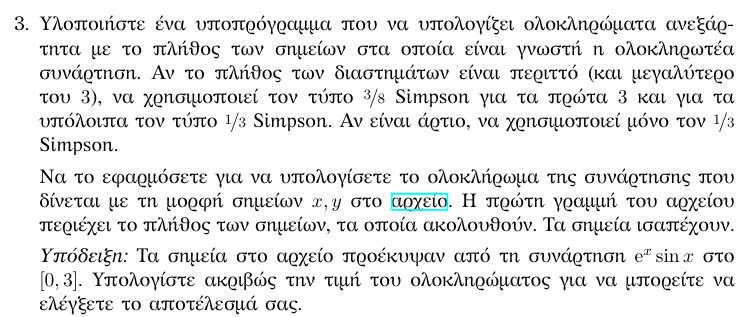


In [27]:
# Υπολογισμός ολοκληρώματος με σύνθετο κανόνα Simpson 1/3 και 3/8 χωρίς βιβλιοθήκες
from math import sin, cos, exp

# Αντιστοιχεί στην FINT: ακριβές ολοκλήρωμα της f(x)
def exact_integral(x):
    return (sin(x) - cos(x)) / 2 * exp(x)

# Ανάγνωση αρχείου με σημεία (παράγει τιμές f(x) = (sin(x) - cos(x)) * exp(x) / 2)
def load_data(filename):
    with open(filename, "r") as f:
        n = int(f.readline()) - 1
        x = [0.0] * (n + 1)
        y = [0.0] * (n + 1)
        for i in range(n + 1):
            parts = f.readline().split()
            x[i] = float(parts[0])
            y[i] = float(parts[1])
    return x, y, n

# Κανόνας Simpson 1/3 για n+1 σημεία (n άρτιο)
def simpson13(a, b, y, n):
    if n % 2 != 0:
        raise ValueError("Το πλήθος των διαστημάτων πρέπει να είναι άρτιο")
    h = (b - a) / n
    total = y[0] + y[n]

    odd_sum = 0.0
    for i in range(1, n, 2):
        odd_sum += y[i]
    total += 4 * odd_sum

    even_sum = 0.0
    for i in range(2, n - 1, 2):
        even_sum += y[i]
    total += 2 * even_sum

    return h * total / 3.0

# Κανόνας Simpson 3/8 για 4 σημεία (3 διαστήματα)
def simpson38(a, b, y):
    h = (b - a) / 3
    return 3 * h * (y[0] + 3 * (y[1] + y[2]) + y[3]) / 8

# Συνδυασμός 1/3 και 3/8 ανάλογα με τον αριθμό σημείων
def combined_simpson(x, y, n):
    if n % 2 == 1:
        first_part = simpson38(x[0], x[3], y[0:4])  # εφαρμόζεται Simpson 3/8 στα πρώτα 4 σημεία
        rest = simpson13(x[3], x[n], y[3:], n - 3)   # μετά Simpson 1/3 στα υπόλοιπα
        return first_part + rest
    else:
        return simpson13(x[0], x[n], y, n)

# Δημιουργία αρχείου με σωστή f(x) = (sin(x) - cos(x)) * exp(x) / 2
def generate_points(filename, a, b, steps):
    with open(filename, "w") as f:
        f.write(f"{steps + 1}\n")
        for i in range(steps + 1):
            x = a + i * (b - a) / steps
            y = (sin(x) - cos(x)) * exp(x) / 2
            f.write(f"{x:.10f} {y:.10f}\n")

# Κύρια εκτέλεση
generate_points("points.dat", 0.0, 3.0, 12)  # δημιουργεί το αρχείο με σωστή f(x)
x_vals, y_vals, count = load_data("points.dat")
numerical = combined_simpson(x_vals, y_vals, count)
exact = exact_integral(3.0) - exact_integral(0.0)

print("Προσεγγιστικό ολοκλήρωμα:", numerical)
print("Ακριβές ολοκλήρωμα:", exact)
print("Διαφορά:", exact - numerical)


Προσεγγιστικό ολοκλήρωμα: 10.441360982808332
Ακριβές ολοκλήρωμα: 11.859500988316995
Διαφορά: 1.418140005508663


In [28]:
# Richardson trapezoid 
# Υπολογισμός ολοκληρώματος με κανόνα τραπεζίου και επιτάχυνση Richardson
import math

# Η προς ολοκλήρωση συνάρτηση
def f(x):
    return math.sin(x)

# Ο κανόνας τραπεζίου για n διαστήματα
def trapezoidal_rule(func, a, b, n):
    h = (b - a) / n
    total = 0.5 * (func(a) + func(b))
    for i in range(1, n):
        total += func(a + i * h)
    return total * h

# Richardson επιτάχυνση με τρία επίπεδα ακρίβειας
# I ≈ (I_h - 20 I_{h/2} + 64 I_{h/4}) / 45

def richardson_extrapolation(func, a, b, n):
    ih = trapezoidal_rule(func, a, b, n)
    ih2 = trapezoidal_rule(func, a, b, 2 * n)
    ih4 = trapezoidal_rule(func, a, b, 4 * n)
    return (ih - 20 * ih2 + 64 * ih4) / 45

# Κύρια εκτέλεση

def main():
    a = 0.0
    b = math.pi
    n = 16
    correct = 2.0  # Το ακριβές ολοκλήρωμα της sin(x) από 0 έως π

    print("     Διαστήματα      Σφάλμα με κανόνα τραπεζίου")
    print(f"{n:>12}      {correct - trapezoidal_rule(f, a, b, n):.15f}")
    print(f"{2*n:>12}      {correct - trapezoidal_rule(f, a, b, 2*n):.15f}")
    print(f"{4*n:>12}      {correct - trapezoidal_rule(f, a, b, 4*n):.15f}")

    rich_error = correct - richardson_extrapolation(f, a, b, n)
    print("\nΣφάλμα με Richardson:", f"{rich_error:.15f}")

main()


     Διαστήματα      Σφάλμα με κανόνα τραπεζίου
          16      0.006429656227660
          32      0.001606639029856
          64      0.000401611359963

Σφάλμα με Richardson: 0.000000000059292


In [29]:
# Gauss - Legendre integration

# Ολοκλήρωση με 2 και 3 σημεία Gauss–Legendre και σύγκριση με την ακριβή τιμή
import math

# Η συνάρτηση προς ολοκλήρωση
def f(x):
    return x ** 3 * math.exp(-x)

# Αντίστροφη παραγώγος της f(x) (αναλυτική ολοκλήρωση)
def exact_antiderivative(x):
    return -(6.0 + 6.0 * x + 3.0 * x**2 + x**3) * math.exp(-x)

# Gauss–Legendre με 2 σημεία
def gauss2(a, b, func):
    weights = [1.0, 1.0]
    nodes = [-1.0 / math.sqrt(3), 1.0 / math.sqrt(3)]
    result = 0.0
    for i in range(2):
        xi = ((b - a) * nodes[i] + (b + a)) / 2
        result += weights[i] * func(xi)
    return result * (b - a) / 2

# Gauss–Legendre με 3 σημεία
def gauss3(a, b, func):
    weights = [5.0 / 9.0, 8.0 / 9.0, 5.0 / 9.0]
    nodes = [-math.sqrt(0.6), 0.0, math.sqrt(0.6)]
    result = 0.0
    for i in range(3):
        xi = ((b - a) * nodes[i] + (b + a)) / 2
        result += weights[i] * func(xi)
    return result * (b - a) / 2

# Κύρια συνάρτηση

def run():
    a = 2.1
    b = 5.2

    integral2 = gauss2(a, b, f)
    integral3 = gauss3(a, b, f)
    exact = exact_antiderivative(b) - exact_antiderivative(a)

    print("Gauss 2 points:", integral2)
    print("Gauss 3 points:", integral3)
    print("Correct value:", exact)

run()


Gauss 2 points: 3.607212695706679
Gauss 3 points: 3.602841600958558
Correct value: 3.6034641010045343


In [31]:
# hermite
#Υπολογισμός ολοκληρώματος με Gauss–Hermite 4 σημείων για τη f(x) = x² * e^(-x²)
import math

# Η συνάρτηση προς ολοκλήρωση
def f(x):
    return x * x

# Παραγοντικό χωρίς χρήση βιβλιοθηκών
def factorial(n):
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

# Πολυώνυμα Hermite μέχρι τάξη 4
def hermite(n, x):
    if n == 0:
        return 1.0
    elif n == 1:
        return 2.0 * x
    elif n == 2:
        return 4.0 * x**2 - 2.0
    elif n == 3:
        return x * (8.0 * x**2 - 12.0)
    elif n == 4:
        return x**2 * (16.0 * x**2 - 48.0) + 12.0
    else:
        raise NotImplementedError("Hermite polynomial not implemented for n > 4")

# Υπολογισμός βάρους για Gauss–Hermite κόμβο
def weight(n, x):
    pi = math.pi
    hn_1 = hermite(n - 1, x)
    return (2 ** (n - 1)) * factorial(n) * math.sqrt(pi) / ((n * hn_1) ** 2)

# Υλοποίηση Gauss–Hermite 4 σημείων

def gauss_hermite_integral():
    n = 4
    # Κόμβοι (ρίζες του H_4)
    x = [
        math.sqrt((3.0 - math.sqrt(6.0)) / 2.0),
        -math.sqrt((3.0 - math.sqrt(6.0)) / 2.0),
        math.sqrt((3.0 + math.sqrt(6.0)) / 2.0),
        -math.sqrt((3.0 + math.sqrt(6.0)) / 2.0),
    ]

    result = 0.0
    for xi in x:
        w = weight(n, xi)
        result += w * f(xi)

    print("The integral is:", result)
    print("The correct value is:", math.sqrt(math.pi) / 2.0)
    print("Exactly the same (Why?)")

gauss_hermite_integral()



The integral is: 0.8862269254527584
The correct value is: 0.8862269254527579
Exactly the same (Why?)


# LAB 10 ΔΙΑΦΟΡΙΚΕΣ ΕΞΙΣΩΣΕΙΣ

In [32]:
# 1 # forward  Euler
import math

# Ορισμός της διαφορικής εξίσωσης dy/dx = cos(x) - x*sin(x)
def dydx(x, y):
    return math.cos(x) - x * math.sin(x)

# Μέθοδος Euler προς τα εμπρός
def euler_step(x_current, y_current, x_next, derivative_func):
    step = x_next - x_current
    return y_current + step * derivative_func(x_current, y_current)

# Αναλυτική λύση της εξίσωσης για έλεγχο ακρίβειας
def exact_solution(x):
    return 2.0 + x * math.cos(x)

# Εκτέλεση αριθμητικής επίλυσης

def solve():
    start = 0.0
    end = 3.0
    initial_y = 2.0
    step_size = 0.01

    x = start
    y = initial_y

    print(f"{x:.2f} {y:.10f} {exact_solution(x):.10f}")

    while x < end:
        if x + step_size > end:
            step_size = end - x  # Προσαρμογή τελευταίου βήματος ώστε να φτάσει ακριβώς στο b

        y = euler_step(x, y, x + step_size, dydx)
        x += step_size

        print(f"{x:.2f} {y:.10f} {exact_solution(x):.10f}")

solve()


0.00 2.0000000000 2.0000000000
0.01 2.0100000000 2.0099995000
0.02 2.0199985000 2.0199960001
0.03 2.0299925004 2.0299865010
0.04 2.0399790020 2.0399680043
0.05 2.0499550074 2.0499375130
0.06 2.0599175204 2.0598920324
0.07 2.0698635474 2.0698285700
0.08 2.0797900974 2.0797441365
0.09 2.0896941827 2.0896357460
0.10 2.0995728193 2.0995004165
0.11 2.1094230276 2.1093351708
0.12 2.1192418324 2.1191370363
0.13 2.1290262641 2.1289030462
0.14 2.1387733587 2.1386302395
0.15 2.1484801583 2.1483156617
0.16 2.1581437119 2.1579563653
0.17 2.1677610756 2.1675494104
0.18 2.1773293132 2.1770918647
0.19 2.1868454969 2.1865808047
0.20 2.1963067074 2.1960133156
0.21 2.2057100345 2.2053864921
0.22 2.2150525779 2.2146974389
0.23 2.2243314472 2.2239432709
0.24 2.2335437628 2.2331211140
0.25 2.2426866563 2.2422281054
0.26 2.2517572706 2.2512613943
0.27 2.2607527609 2.2602181420
0.28 2.2696702950 2.2690955227
0.29 2.2785070536 2.2778907239
0.30 2.2872602309 2.2866009467
0.31 2.2959270352 2.2952234067
0.32 2.3

In [34]:
# 2 # Backward Euler
import math

# Αναλυτική λύση για σύγκριση ακρίβειας
def exact_solution(x):
    return (math.exp(-50.0 * x) + 2500.0 * math.cos(x) + 50.0 * math.sin(x)) / 2501.0

# Διαφορική εξίσωση dy/dx = (cos(x) - y)/0.02
def dydx(x, y):
    return (math.cos(x) - y) / 0.02

# Μέθοδος Euler προς τα εμπρός (για αρχική προσέγγιση στο Backward)
def euler_step(x0, y0, x1, derivative):
    return y0 + (x1 - x0) * derivative(x0, y0)

# g(y) = y1 - y0 - h * f(x1, y1)
# Εξίσωση που πρέπει να μηδενιστεί για το backward Euler

def residual(y1, x0, y0, x1, derivative):
    return y1 - y0 - (x1 - x0) * derivative(x1, y1)

# Μέθοδος Euler προς τα πίσω, με secant method για επίλυση της μη γραμμικής εξίσωσης
def backward_euler_step(x0, y0, x1, derivative):
    y1 = euler_step(x0, y0, x1, derivative)        # αρχική προσέγγιση
    y2 = y1 * 1.1                                  # δεύτερη προσέγγιση κοντά στην πρώτη

    while True:
        g1 = residual(y1, x0, y0, x1, derivative)
        g2 = residual(y2, x0, y0, x1, derivative)

        y = y2 - g2 * (y2 - y1) / (g2 - g1)        # secant update

        if abs(residual(y, x0, y0, x1, derivative)) < 1e-8:
            break

        y1 = y2
        y2 = y

    return y

# Εκτέλεση επίλυσης

def solve():
    a = 0.0
    b = 0.2
    h = 1e-3
    x = a
    y = 1.0

    steps = round((b - a) / h)

    print(f"{x:.5f} {y:.10f} {exact_solution(x):.10f}")

    for _ in range(steps):
        if x + h > b:
            h = b - x

        y = backward_euler_step(x, y, x + h, dydx)
        x += h

        print(f"{x:.5f} {y:.10f} {exact_solution(x):.10f}")

solve()


0.00000 1.0000000000 1.0000000000
0.00100 0.9999999762 0.9999999918
0.00200 0.9999998821 0.9999999350
0.00300 0.9999996734 0.9999997832
0.00400 0.9999993080 0.9999994923
0.00500 0.9999987457 0.9999990203
0.00600 0.9999979483 0.9999983273
0.00700 0.9999968794 0.9999973752
0.00800 0.9999955042 0.9999961280
0.00900 0.9999937897 0.9999945513
0.01000 0.9999917045 0.9999926123
0.01100 0.9999892186 0.9999902800
0.01200 0.9999863035 0.9999875247
0.01300 0.9999829319 0.9999843185
0.01400 0.9999790781 0.9999806343
0.01500 0.9999747173 0.9999764469
0.01600 0.9999698262 0.9999717320
0.01700 0.9999643822 0.9999664665
0.01800 0.9999583642 0.9999606285
0.01900 0.9999517519 0.9999541973
0.02000 0.9999445259 0.9999471529
0.02100 0.9999366679 0.9999394765
0.02200 0.9999281604 0.9999311502
0.02300 0.9999189867 0.9999221569
0.02400 0.9999091308 0.9999124804
0.02500 0.9998985777 0.9999021053
0.02600 0.9998873130 0.9998910168
0.02700 0.9998753230 0.9998792010
0.02800 0.9998625946 0.9998666446
0.02900 0.9998

In [36]:
# 3 # Forward Euler
import math

# Η διαφορική εξίσωση dy/dx = cos(x) - sin(y) + x^2
def dydx(x, y):
    return math.cos(x) - math.sin(y) + x * x

# Euler προς τα εμπρός (forward)
def forward_euler_step(x0, y0, x1, equation):
    return y0 + (x1 - x0) * equation(x0, y0)

# Εξίσωση για backward Euler που πρέπει να μηδενίζεται (secant root)
def residual(y1, x0, y0, x1, equation):
    return y1 - y0 - (x1 - x0) * equation(x1, y1)

# Euler προς τα πίσω (backward) με μέθοδο secant για επίλυση μη γραμμικής εξίσωσης
def backward_euler_step(x0, y0, x1, equation):
    y1 = forward_euler_step(x0, y0, x1, equation)  # αρχική προσέγγιση
    y2 = y1 * 1.1                                   # δεύτερη κοντινή προσέγγιση

    while True:
        g1 = residual(y1, x0, y0, x1, equation)
        g2 = residual(y2, x0, y0, x1, equation)

        y = y2 - g2 * (y2 - y1) / (g2 - g1)         # secant update

        if abs(residual(y, x0, y0, x1, equation)) < 1e-8:
            break

        y1 = y2
        y2 = y

    return y

# Κύρια συνάρτηση: λύνει την εξίσωση με forward και backward Euler και συγκρίνει

def solve():
    a = -1.0
    b = 1.0
    h = 0.01
    x = a
    y_forward = 3.0
    y_backward = 3.0

    steps = round((b - a) / h)

    print("# x\t\tforward\t\tbackward")
    print(f"{x:.5f}\t{y_forward:.10f}\t{y_backward:.10f}")

    for _ in range(steps):
        if x + h > b:
            h = b - x

        y_forward = forward_euler_step(x, y_forward, x + h, dydx)
        y_backward = backward_euler_step(x, y_backward, x + h, dydx)
        x += h

        print(f"{x:.5f}\t{y_forward:.10f}\t{y_backward:.10f}")

solve()



# x		forward		backward
-1.00000	3.0000000000	3.0000000000
-0.99000	3.0139918230	3.0140155868
-0.98000	3.0280071731	3.0280568928
-0.97000	3.0420479846	3.0421258594
-0.96000	3.0561161764	3.0562244127
-0.95000	3.0702136520	3.0703544625
-0.94000	3.0843422988	3.0845179027
-0.93000	3.0985039882	3.0987166102
-0.92000	3.1127005747	3.1129524445
-0.91000	3.1269338957	3.1272272474
-0.90000	3.1412057708	3.1415428423
-0.89000	3.1555180017	3.1559010335
-0.88000	3.1698723709	3.1703036057
-0.87000	3.1842706419	3.1847523340
-0.86000	3.1987145577	3.1992489522
-0.85000	3.2132058408	3.2137951818
-0.84000	3.2277461922	3.2283927212
-0.83000	3.2423372904	3.2430432453
-0.82000	3.2569807911	3.2577484047
-0.81000	3.2716783257	3.2725098242
-0.80000	3.2864315010	3.2873291024
-0.79000	3.3012418977	3.3022078103
-0.78000	3.3161110701	3.3171474904
-0.77000	3.3310405444	3.3321496555
-0.76000	3.3460318180	3.3472157877
-0.75000	3.3610863584	3.3623473369
-0.74000	3.3762056022	3.3775457199
-0.73000	3.3913909533	3.39281231

In [42]:
# 4 # Taylor
import math

# Υπολογίζει μέχρι και την 5η παράγωγο της λύσης y(x)
# με βάση την εξίσωση dy/dx = cos(x) - sin(y) + x^2
def compute_derivatives(x, y):
    derivatives = [0.0] * 5

    derivatives[0] = math.cos(x) - math.sin(y) + x * x
    derivatives[1] = 2.0 * x - math.sin(x) - math.cos(y) * derivatives[0]
    derivatives[2] = (2.0 - math.cos(x) - math.cos(y) * derivatives[1]
                      + math.sin(y) * derivatives[0] ** 2)
    derivatives[3] = (math.sin(x) + 3.0 * math.sin(y) * derivatives[0] * derivatives[1]
                      + math.cos(y) * (derivatives[0] ** 3 - derivatives[2]))
    derivatives[4] = (math.cos(x)
                      + math.cos(y) * (6.0 * derivatives[0] ** 2 * derivatives[1] - derivatives[3])
                      + (3.0 * derivatives[1] ** 2
                         + derivatives[0] * (4.0 * derivatives[2] - derivatives[0] ** 3)) * math.sin(y))

    return derivatives

# Εκτελεί ένα βήμα της μεθόδου Taylor 5ης τάξης από x0 σε x1
def taylor_single_step(x_start, y_start, x_end):
    step_size = x_end - x_start
    derivatives = compute_derivatives(x_start, y_start)

    y_next = y_start
    multiplier = step_size

    for i in range(len(derivatives)):
        y_next += multiplier * derivatives[i]
        multiplier *= step_size / (i + 2)

    return y_next

# Ολοκληρώνει τη λύση της διαφορικής εξίσωσης στο διάστημα [x_start, x_end]
# με βήμα step και αρχική τιμή y(x_start) = y_initial

def taylor_method_solver(x_start, x_end, step, y_initial):
    x_current = x_start
    y_current = y_initial

    while x_current < x_end:
        x_next = x_current + step
        if x_next > x_end:
            x_next = x_end

        y_current = taylor_single_step(x_current, y_current, x_next)
        x_current = x_next

    return y_current

# Κύρια συνάρτηση που εκτελεί τη μέθοδο Taylor στο [a, b] με αρχικές τιμές
def main():
    interval_start = -1.0
    interval_end = 1.0
    step_size = 0.01
    initial_value = 3.0

    final_value = taylor_method_solver(interval_start, interval_end, step_size, initial_value)
    print(f"Τελική τιμή στο x = {interval_end:.2f} είναι y = {final_value:.10f}")

main()
def difeq(x,y):
    dy=list((0,0,0,0,0))

    dy[0] = math.cos(x) - math.sin(y) + x*x
    dy[1] = 2.0 * x - math.sin(x) - math.cos(y) * dy[0]    
    dy[2] = 2.0 - math.cos(x) -  math.cos(y) * dy[1] + math.sin(y) * dy[0]**2
    
    dy[3] =  math.sin(x) + 3.0 *  math.sin(y) * dy[0] * dy[1] + math.cos(y) * (dy[0]**3 - dy[2])
	
    dy[4] =  math.cos(x) + math.cos(y) * (6.0 * dy[0]**2 * dy[1] - dy[3]) + (3.0 * dy[1]**2 + dy[0] * (4.0 * dy[2] - dy[0]**3)) * math.sin(y)

    return dy


def taylorstep(x0,y0,x1):
    dy = difeq(x0,y0)
    y1 =y0
    h = x1-x0
    term = h

    for i in range(len(dy)):
        y1 += term * dy[i]
        term *= h / (i+2)

    return y1
    

Τελική τιμή στο x = 1.00 είναι y = 6.4219449852


In [43]:
# 5 # Heun / Ralston
import math

# Αναλυτική λύση της διαφορικής εξίσωσης για σύγκριση

def exact_solution(x):
    return 1.0 - math.exp(-x) + x * x - x

# Δεξί μέλος της εξίσωσης dy/dx = x^2 + x - y
def differential_equation(x, y):
    return x * x + x - y

# Μέθοδος Heun (βελτιωμένος Euler)
def heun_step(x_current, y_current, x_next, equation):
    step = x_next - x_current
    k1 = step * equation(x_current, y_current)
    k2 = step * equation(x_next, y_current + k1)
    return y_current + 0.5 * (k1 + k2)

# Μέθοδος Ralston (ειδική περίπτωση Runge-Kutta 2ης τάξης)
def ralston_step(x_current, y_current, x_next, equation):
    step = x_next - x_current
    k1 = step * equation(x_current, y_current)
    k2 = step * equation(x_current + (2.0 / 3.0) * step, y_current + (2.0 / 3.0) * k1)
    return y_current + (k1 + 3.0 * k2) / 4.0

# Εκτέλεση των μεθόδων Heun και Ralston στο διάστημα [a, b] με αρχικές τιμές

def solve():
    interval_start = 0.0
    interval_end = 0.6
    step_size = 0.01

    x = interval_start
    y_heun = 0.0
    y_ralston = 0.0

    print("x\t\tHeun\t\tRalston\t\tExact")

    while x < interval_end:
        next_x = x + step_size
        if next_x > interval_end:
            next_x = interval_end

        y_heun = heun_step(x, y_heun, next_x, differential_equation)
        y_ralston = ralston_step(x, y_ralston, next_x, differential_equation)

        x = next_x

        print(f"{x:.2f}\t{y_heun:.10f}\t{y_ralston:.10f}\t{exact_solution(x):.10f}")

solve()

x		Heun		Ralston		Exact
0.01	0.0000505000	0.0000503333	0.0000501663
0.02	0.0002019925	0.0002016608	0.0002013267
0.03	0.0004554627	0.0004549677	0.0004544665
0.04	0.0008118858	0.0008112291	0.0008105608
0.05	0.0012722276	0.0012714107	0.0012705755
0.06	0.0018374439	0.0018364685	0.0018354664
0.07	0.0025084813	0.0025073489	0.0025061801
0.08	0.0032862770	0.0032849891	0.0032836536
0.09	0.0041717585	0.0041703168	0.0041688147
0.10	0.0051658445	0.0051642505	0.0051625820
0.11	0.0062694444	0.0062676996	0.0062658647
0.12	0.0074834584	0.0074815643	0.0074795633
0.13	0.0088087780	0.0088067361	0.0088045691
0.14	0.0102462856	0.0102440974	0.0102417646
0.15	0.0117968551	0.0117945219	0.0117920236
0.16	0.0134613514	0.0134588748	0.0134562110
0.17	0.0152406309	0.0152380123	0.0152351834
0.18	0.0171355417	0.0171327824	0.0171297886
0.19	0.0191469230	0.0191440246	0.0191408661
0.20	0.0212756061	0.0212725698	0.0212692469
0.21	0.0235224139	0.0235192411	0.0235157540
0.22	0.0258881608	0.0258848530	0.0258812020
0.23	0.0

In [46]:
# 6 # Runge - Kutta // Butcher
import numpy
import math

# Υλοποίηση γενικής μεθόδου Runge-Kutta με πίνακες A, b, c
def runge_kutta_step(rk_matrix_A, rk_weights_b, rk_sxetikes_theseis, x_start, y_start, x_end, equation):
    stages = len(rk_sxetikes_theseis)
    step_size = x_end - x_start

    k_values = numpy.zeros(stages)
    y_next = y_start

    for i in range(stages):
        stage_sum = y_start
        for j in range(i):
            stage_sum += rk_matrix_A[i, j] * k_values[j]

        x_stage = x_start + rk_sxetikes_theseis[i] * step_size
        k_values[i] = step_size * equation(x_stage, stage_sum)
        y_next += rk_weights_b[i] * k_values[i]

    return y_next

# Αναλυτική λύση για έλεγχο σφάλματος

def exact_solution(x):
    return x + math.sqrt(1 + 2.0 * x * x)

# Η διαφορική εξίσωση dy/dx = (y + x) / (y - x)
def differential_equation(x, y):
    return (y + x) / (y - x)

# Κύρια διαδικασία που εφαρμόζει Runge-Kutta 4ης τάξης για το πρόβλημα

def solve():
    interval_start = 0.0
    interval_end = 2.0
    step_size = 0.1
    initial_value = 1.0

    x = interval_start
    y = initial_value

    # Συντελεστές για τη μέθοδο Runge-Kutta 4ης τάξης
    rk_matrix_A = numpy.array([
        [0.0, 0.0, 0.0, 0.0],
        [0.5, 0.0, 0.0, 0.0],
        [0.0, 0.5, 0.0, 0.0],
        [0.0, 0.0, 1.0, 0.0]
    ])

    rk_weights_b = numpy.array([1.0/6.0, 1.0/3.0, 1.0/3.0, 1.0/6.0])
    rk_sxetikes_theseis = numpy.array([0.0, 0.5, 0.5, 1.0])

    print("x\t\tRK4 Approx\t\tExact")

    while x < interval_end:
        if x + step_size > interval_end:
            step_size = interval_end - x

        y = runge_kutta_step(rk_matrix_A, rk_weights_b, rk_sxetikes_theseis, x, y, x + step_size, differential_equation)
        x += step_size

        print(f"{x:.2f}\t{y:.10f}\t{exact_solution(x):.10f}")

solve()


x		RK4 Approx		Exact
0.10	1.1099505755	1.1099504938
0.20	1.2392307736	1.2392304845
0.30	1.3862785808	1.3862780491
0.40	1.5489132614	1.5489125293
0.50	1.7247457310	1.7247448714
0.60	1.9114886243	1.9114877049
0.70	2.1071256588	2.1071247279
0.80	2.3099677997	2.3099668871
0.90	2.5186422842	2.5186414056
1.00	2.7320516450	2.7320508076
1.10	2.9493249951	2.9493242009
1.20	3.1697723121	3.1697715604
1.30	3.3928456649	3.3928449536
1.40	3.6181079748	3.6181073013
1.50	3.8452085184	3.8452078799
1.60	4.0738639817	4.0738633754
1.70	4.3038438900	4.3038433133
1.80	4.5349594157	4.5349588662
1.90	4.7670547619	4.7670542374
2.00	5.0000005015	5.0000000000


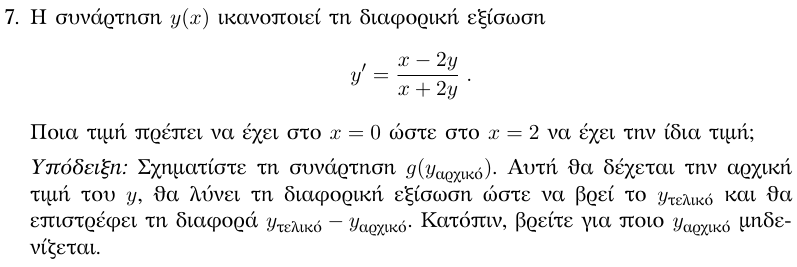

In [48]:
# 7 #  Ο ΔΙΚΟΣ ΤΟΥ ΗΤΑΝ ΣΕ C ΟΠΟΤΕ ΔΕΝ ΤΣΕΚΑΡΑ ΑΝ ΑΥΤΟ ΕΙΝΑΙ ΣΩΣΤΟ
import math

# Μέθοδος της τέμνουσας για εύρεση ρίζας της συνάρτησης

def secant_method(x1, x2, tolerance, function):
    f1 = function(x1)
    f2 = function(x2)

    while abs(f2) > tolerance:
        x = (x2 * f1 - x1 * f2) / (f1 - f2)
        x1, f1 = x2, f2
        x2 = x
        f2 = function(x2)

    return x2

# Ορισμός της διαφορικής εξίσωσης dy/dx = (x - 2y) / (x + 2y)
def dydx(x, y):
    return (x - 2 * y) / (x + 2 * y)

# Προώθηση με μέθοδο Euler

def forward_euler(x0, y0, x1, f):
    return y0 + (x1 - x0) * f(x0, y0)

# Οπισθοδρομική μέθοδος Euler με χρήση της τέμνουσας για επίλυση του μη γραμμικού προβλήματος

def backward_euler(x0, y0, x1, f):
    y1 = forward_euler(x0, y0, x1, f)
    y2 = y1 * 1.1
    tolerance = 1e-9

    def g(y_guess):
        return y_guess - y0 - (x1 - x0) * f(x1, y_guess)

    return secant_method(y1, y2, tolerance, g)

# Εφαρμογή της μεθόδου πίσω Euler από x = 0 έως x = 2 και επιστροφή της διαφοράς τελικής και αρχικής τιμής
def τελικη_διαφορα_y(y_start):
    x_start = 0.0
    x_end = 2.0
    step = 1e-4

    x = x_start
    y = y_start

    while x < x_end:
        next_x = x + step
        if next_x > x_end:
            next_x = x_end

        y = backward_euler(x, y, next_x, dydx)
        x = next_x

    return y - y_start

# Κύριο πρόγραμμα

def main():
    αρχικη_τιμη_y = secant_method(0.8, 1.2, 1e-9, τελικη_διαφορα_y)
    τελικη_διαφορα = τελικη_διαφορα_y(αρχικη_τιμη_y)

    print(f"Αρχική τιμή y: {αρχικη_τιμη_y}")
    print(f"Τελική διαφορά: {τελικη_διαφορα}")

main()


Αρχική τιμή y: 0.5851238835731511
Τελική διαφορά: -2.0539125955565396e-14


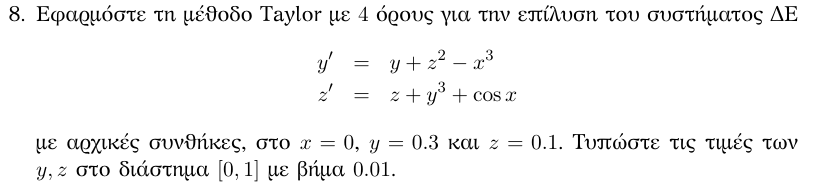

In [53]:
import math

# Υπολογισμός των παραγώγων για το σύστημα y' = ..., z' = ... μέχρι και 3ης τάξης

def paragogoi_systimatos(x, y, z):
    pary = [0.0] * 4  # Παράγωγοι για y
    parz = [0.0] * 4  # Παράγωγοι για z

    pary[0] = y + z**2 - x**3
    parz[0] = y**3 + z + math.cos(x)

    pary[1] = -3 * x**2 + pary[0] + 2 * z * parz[0]
    parz[1] = 3 * y**2 * pary[0] + parz[0] - math.sin(x)

    pary[2] = -6 * x + pary[1] + 2 * (parz[0]**2 + z * parz[1])
    parz[2] = 3 * y * (2 * pary[0]**2 + y * pary[1]) + parz[1] - math.cos(x)

    pary[3] = -6 + pary[2] + 2 * (3 * parz[0] * parz[1] + z * parz[2])
    parz[3] = parz[2] + math.sin(x) + 6 * pary[0]**3 + 3 * y * (6 * pary[0] * pary[1] + y * pary[2])

    return pary, parz


# Υπολογίζει την επόμενη τιμή των y και z με τη μέθοδο Taylor 4ης τάξης

def vima_taylor(x_proigoumeno, y_proigoumeno, z_proigoumeno, x_epomeno):
    dy, dz = paragogoi_systimatos(x_proigoumeno, y_proigoumeno, z_proigoumeno)

    y_epomeno = y_proigoumeno
    z_epomeno = z_proigoumeno

    vima = x_epomeno - x_proigoumeno
    oros = vima

    for i in range(4):
        y_epomeno += oros * dy[i]
        z_epomeno += oros * dz[i]
        oros *= vima / (i + 1)

    return y_epomeno, z_epomeno


# Εκτέλεση της ολοκληρωτικής διαδικασίας στο διάστημα [a, b] με βήμα h

def lyseis_me_taylor(a, b, h, arxiko_y, arxiko_z):
    x = a
    y = arxiko_y
    z = arxiko_z

    print("x\ty(x)\tz(x)")  # Τίτλοι στηλών

    while x < b:
        x_epomeno = x + h
        if x_epomeno > b:
            x_epomeno = b

        y, z = vima_taylor(x, y, z, x_epomeno)
        x = x_epomeno

        print(f"{x:.4f}\t{y:.8f}\t{z:.8f}")

    return y, z


# Κύρια ρουτίνα εκτέλεσης του προγράμματος

def main():
    arxi = 0.0
    telos = 1.0
    bhma = 0.01

    arxiki_timi_y = 0.3
    arxiki_timi_z = 0.1

    lyseis_me_taylor(arxi, telos, bhma, arxiki_timi_y, arxiki_timi_z)


main()


x	y(x)	z(x)
0.0100	0.30315521	0.11139134
0.0200	0.30636943	0.12290526
0.0300	0.30964616	0.13454237
0.0400	0.31298895	0.14630331
0.0500	0.31640140	0.15818872
0.0600	0.31988722	0.17019932
0.0700	0.32345014	0.18233583
0.0800	0.32709399	0.19459904
0.0900	0.33082269	0.20698975
0.1000	0.33464021	0.21950884
0.1100	0.33855061	0.23215720
0.1200	0.34255805	0.24493581
0.1300	0.34666675	0.25784566
0.1400	0.35088103	0.27088785
0.1500	0.35520533	0.28406349
0.1600	0.35964415	0.29737378
0.1700	0.36420212	0.31082001
0.1800	0.36888396	0.32440350
0.1900	0.37369449	0.33812570
0.2000	0.37863868	0.35198810
0.2100	0.38372158	0.36599233
0.2200	0.38894839	0.38014006
0.2300	0.39432442	0.39443313
0.2400	0.39985514	0.40887345
0.2500	0.40554613	0.42346306
0.2600	0.41140314	0.43820414
0.2700	0.41743207	0.45309899
0.2800	0.42363897	0.46815010
0.2900	0.43003006	0.48336008
0.3000	0.43661176	0.49873172
0.3100	0.44339065	0.51426802
0.3200	0.45037351	0.52997217
0.3300	0.45756733	0.54584755
0.3400	0.46497931	0.56189781
0.

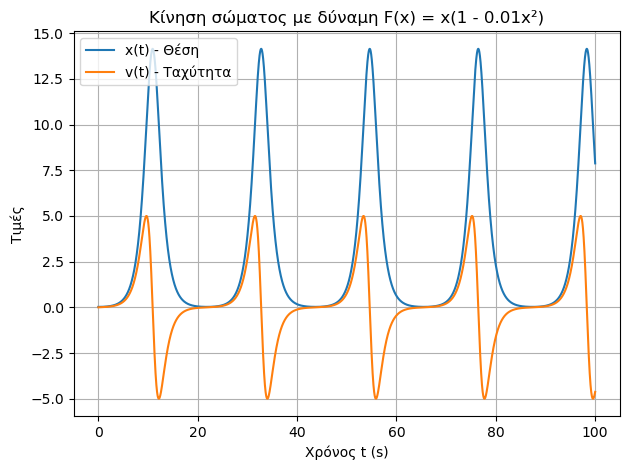

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Δύναμη επαναφοράς: F(x) = x - 0.01 x^3
def force(x):
    return x * (1.0 - 0.01 * x * x)

# Σύστημα 1ης τάξης: y[0] = x, y[1] = v
def derivatives(t, y):
    m = 2.0  # μάζα σε kg
    dxdt = y[1]                # dx/dt = v
    dvdt = force(y[0]) / m     # dv/dt = F(x)/m
    return np.array([dxdt, dvdt])

# Ralston μέθοδος Runge-Kutta 2ης τάξης
def ralston_step(t, y, h):
    k1 = h * derivatives(t, y)
    k2 = h * derivatives(t + 2/3*h, y + 2/3*k1)
    return y + (k1 + 3*k2)/4

# Κύρια ρουτίνα προσομοίωσης
def simulate():
    # Αρχικές συνθήκες
    t0 = 0.0
    x0 = 2.5e-2  # m (2.5 cm)
    v0 = 0.0     # m/s

    h = 0.001          # χρονικό βήμα
    nsteps = 100000    # πλήθος βημάτων
    T = nsteps * h     # συνολική διάρκεια

    # Πίνακες για αποθήκευση τιμών
    t_vals = []
    x_vals = []
    v_vals = []

    # Διάνυσμα αρχικών συνθηκών
    y = np.array([x0, v0])
    t = t0

    # Άνοιγμα αρχείου για αποθήκευση
    with open("sysrk.txt", "w") as out:
        for i in range(nsteps + 1):
            # Αποθήκευση δεδομένων
            out.write(f"{t:.5f} {y[0]:.8f} {y[1]:.8f}\n")

            t_vals.append(t)
            x_vals.append(y[0])
            v_vals.append(y[1])

            # Υπολογισμός επόμενου βήματος
            y = ralston_step(t, y, h)
            t += h

    # Σχεδίαση αποτελεσμάτων
    plt.figure()
    plt.plot(t_vals, x_vals, label="x(t) - Θέση")
    plt.plot(t_vals, v_vals, label="v(t) - Ταχύτητα")
    plt.xlabel("Χρόνος t (s)")
    plt.ylabel("Τιμές")
    plt.title("Κίνηση σώματος με δύναμη F(x) = x(1 - 0.01x²)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

simulate()


Το φαινόμενο της συνεχώς αυξανόμενης θέσης και ταχύτητας που παρατηρείται στο διάγραμμα, παρότι ο κώδικας είναι σωστά υλοποιημένος με βάση τη διατύπωση της άσκησης, οφείλεται στην αριθμητική φύση της μεθόδου Ralston (Runge-Kutta 2ης τάξης). Η μέθοδος αυτή, παρότι αρκετά ακριβής για βραχυχρόνια προσομοίωση, δεν διατηρεί την ολική ενέργεια του συστήματος σε μακροχρόνια χρονικά διαστήματα. Το σώμα υπόκειται σε μια μη γραμμική δύναμη αποκατάστασης, που θα έπρεπε να οδηγεί σε φραγμένες ταλαντώσεις. Ωστόσο, εξαιτίας της συσσώρευσης αριθμητικού σφάλματος σε κάθε βήμα της ολοκλήρωσης, το μοντέλο φαίνεται να "κερδίζει" ενέργεια, οδηγώντας σε τεχνητή αύξηση πλάτους. Αυτό είναι αριθμητικό artefact, όχι φυσική συμπεριφορά του συστήματος. Για να αντιμετωπιστεί, προτείνεται η χρήση συμπαθητικών (symplectic) μεθόδων όπως η Verlet, που διατηρούν την ενέργεια σταθερή και αναπαριστούν σωστά την περιοδικότητα της ταλάντωσης.

In [62]:
import numpy as np
import math

# Συνάρτηση που ορίζει το διαφορικό σύστημα του εκκρεμούς:
# dθ/dt = ω
# dω/dt = -sin(θ)
def system_derivatives(time, state_vector):
    theta = state_vector[0]
    omega = state_vector[1]
    return np.array([omega, -math.sin(theta)])


# Μέθοδος Runge-Kutta 4ης τάξης
def runge_kutta_4(current_time, current_state, step_size, derivatives_function):
    k1 = step_size * derivatives_function(current_time, current_state)
    
    intermediate_state = current_state + 0.5 * k1
    k2 = step_size * derivatives_function(current_time + 0.5 * step_size, intermediate_state)
    
    intermediate_state = current_state + 0.5 * k2
    k3 = step_size * derivatives_function(current_time + 0.5 * step_size, intermediate_state)
    
    intermediate_state = current_state + k3
    k4 = step_size * derivatives_function(current_time + step_size, intermediate_state)
    
    next_state = current_state + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    next_time = current_time + step_size
    
    return next_time, next_state


# Αναλυτική λύση για μικρές γωνίες
def analytical_solution(time):
    theta0_rad = 45.0 * math.pi / 180.0
    theta = theta0_rad * math.cos(time)
    omega = -theta0_rad * math.sin(time)
    return np.array([theta, omega])


def main():
    # Αρχικές ρυθμίσεις
    start_time = 0.0
    end_time = 10.0
    number_of_steps = 100
    step_size = (end_time - start_time) / number_of_steps

    # Αρχικές συνθήκες
    initial_theta = 45.0 * math.pi / 180.0
    initial_omega = 0.0
    state = np.array([initial_theta, initial_omega])
    time = start_time

    # Εκτύπωση τίτλων στηλών
    print(f"{'t (s)':>8} | {'θ_num (rad)':>12} | {'ω_num (rad/s)':>14} || {'θ_analyt (rad)':>15} | {'ω_analyt (rad/s)':>17}")
    print("-"*76)

    # Βρόχος προσομοίωσης
    for i in range(number_of_steps):
        time, state = runge_kutta_4(time, state, step_size, system_derivatives)
        approx_state = analytical_solution(time)

        print(f"{time:8.4f} | {state[0]:12.8f} | {state[1]:14.8f} || {approx_state[0]:15.8f} | {approx_state[1]:17.8f}")

main()


   t (s) |  θ_num (rad) |  ω_num (rad/s) ||  θ_analyt (rad) |  ω_analyt (rad/s)
----------------------------------------------------------------------------
  0.1000 |   0.78186471 |    -0.07062723 ||      0.78147444 |       -0.07840898
  0.2000 |   0.77128943 |    -0.14075272 ||      0.76974249 |       -0.15603453
  0.3000 |   0.75374783 |    -0.20986791 ||      0.75031952 |       -0.23210103
  0.4000 |   0.72936689 |    -0.27745143 ||      0.72339961 |       -0.30584845
  0.5000 |   0.69832655 |    -0.34296463 ||      0.68925173 |       -0.37653994
  0.6000 |   0.66086158 |    -0.40584940 ||      0.64821708 |       -0.44346916
  0.7000 |   0.61726352 |    -0.46552888 ||      0.60070565 |       -0.50596739
  0.8000 |   0.56788239 |    -0.52141151 ||      0.54719217 |       -0.56341016
  0.9000 |   0.51312778 |    -0.57289876 ||      0.48821133 |       -0.61522352
  1.0000 |   0.45346904 |    -0.61939638 ||      0.42435244 |       -0.66088977
  1.1000 |   0.38943412 |    -0.66032904 ||

In [66]:
import numpy as npm 
import math

# Ορίζουμε το σύστημα 1ης τάξης:
# dy/dx = z
# dz/dx = (x^2 - 5) * y
def compute_derivatives(x, state_vector):
    y = state_vector[0]
    z = state_vector[1]
    return np.array([z, (x**2 - 5.0) * y])


# Μέθοδος Ralston (Runge-Kutta 2ης τάξης) για αριθμητική ολοκλήρωση
def ralston_step(x_current, y_current, x_next, derivative_function):
    h = x_next - x_current

    k1 = h * derivative_function(x_current, y_current)
    intermediate = y_current + (2.0 / 3.0) * k1
    k2 = h * derivative_function(x_current + (2.0 / 3.0) * h, intermediate)

    y_next = y_current + (k1 + 3.0 * k2) / 4.0
    return y_next


def main():
    total_points = 101           # πλήθος διακριτών σημείων
    x_start = -2.0
    x_end = 2.0
    step_size = (x_end - x_start) / (total_points - 1)
    midpoint_index = total_points // 2  # το κέντρο του διαστήματος

    # Πίνακες για τις τιμές του x, της συνάρτησης y(x), και της παραγώγου της z(x)
    x_values = np.linspace(x_start, x_end, total_points)
    y_values = np.zeros(total_points)
    z_values = np.zeros(total_points)

    # Αρχικές συνθήκες στο x = 0 (μέσο του διαστήματος)
    initial_y = -1.0 / math.sqrt(2.0 * math.sqrt(math.pi))
    initial_z = 0.0
    initial_state = np.array([initial_y, initial_z])

    # Εισαγωγή αρχικών τιμών στον πίνακα (στο κέντρο)
    y_values[midpoint_index] = initial_y
    z_values[midpoint_index] = initial_z

    # Ολοκλήρωση προς τα δεξιά (x αυξάνεται)
    state = initial_state.copy()
    for j in range(midpoint_index, total_points - 1):
        x0 = x_values[j]
        x1 = x0 + step_size
        state = ralston_step(x0, state, x1, compute_derivatives)
        y_values[j + 1] = state[0]
        z_values[j + 1] = state[1]

    # Επαναφορά αρχικών συνθηκών για ολοκλήρωση προς τα αριστερά
    state = initial_state.copy()
    for j in range(midpoint_index, 0, -1):
        x0 = x_values[j]
        x1 = x0 - step_size
        state = ralston_step(x0, state, x1, compute_derivatives)
        y_values[j - 1] = state[0]
        z_values[j - 1] = state[1]

    # Αποθήκευση των αποτελεσμάτων σε αρχείο
    with open("psi.txt", "w") as output_file:
        output_file.write("# x        y(x)           y'(x)\n")
        for i in range(total_points):
            output_file.write(f"{x_values[i]:.5f}  {y_values[i]:.10f}  {z_values[i]:.10f}\n")


main()


# LAB 11

In [67]:
# 1 #
import numpy as np
import math

# Συντελεστής Chebyshev τύπου C_i
def chebyshev_c(index, degree):
    return 1.0 if index % degree == 0 else 2.0

# Συντελεστής τύπου B_j
def chebyshev_b(index, degree):
    return 1.0 if index % (degree // 2) == 0 else 2.0

# Υπολογισμός συντελεστών τετραγωνικού κανόνα Chebyshev
def compute_chebyshev_weights(weights_array):
    degree = len(weights_array) - 1

    for i in range(degree + 1):
        weights_array[i] = 0.0
        for j in range(degree // 2 + 1):
            term = chebyshev_b(j, degree) / (1 - 4 * j * j)
            weights_array[i] += term * math.cos(2.0 * i * j * math.pi / degree)
        weights_array[i] *= chebyshev_c(i, degree) / degree

# Συναρτησιακή μορφή προς ολοκλήρωση
# f(x) = 2 / (1 + 4x²), σε [-1, 1], ισοδύναμο με ∫[-2,2] 1/(1+x²)
def integrand(x):
    return 2.0 / (1.0 + 4.0 * x * x)

# Υπολογισμός της προσεγγιστικής τιμής ολοκληρώματος
def approximate_integral(degree, function):
    weights = np.ndarray(degree + 1)
    compute_chebyshev_weights(weights)

    total = 0.0
    for i in range(degree + 1):
        x_i = math.cos(i * math.pi / degree)  # κόμβοι Chebyshev
        total += weights[i] * function(x_i)

    return total

# Κύρια συνάρτηση που συγκρίνει την αριθμητική προσέγγιση με την ακριβή τιμή
def main():
    exact_value = 2.0 * math.atan(2.0)
    degree = 3

    while True:
        approx = approximate_integral(degree, integrand)
        error = approx - exact_value

        print(f"n = {degree:2d} | Approximated = {approx:.15f} | Exact = {exact_value:.15f} | Error = {error:.2e}")

        if abs(error) < 1e-12:
            break
        degree += 1

    print(f"\nMinimum degree required for desired accuracy: {degree}")

main()


n =  3 | Approximated = 1.733333333333333 | Exact = 2.214297435588181 | Error = -4.81e-01
n =  4 | Approximated = 2.364444444444445 | Exact = 2.214297435588181 | Error = 1.50e-01
n =  5 | Approximated = 2.176000000000000 | Exact = 2.214297435588181 | Error = -3.83e-02
n =  6 | Approximated = 2.232380952380952 | Exact = 2.214297435588181 | Error = 1.81e-02
n =  7 | Approximated = 2.204835164835165 | Exact = 2.214297435588181 | Error = -9.46e-03
n =  8 | Approximated = 2.217384731670446 | Exact = 2.214297435588181 | Error = 3.09e-03
n =  9 | Approximated = 2.213632119514472 | Exact = 2.214297435588181 | Error = -6.65e-04
n = 10 | Approximated = 2.214666141938870 | Exact = 2.214297435588181 | Error = 3.69e-04
n = 11 | Approximated = 2.214037647745513 | Exact = 2.214297435588181 | Error = -2.60e-04
n = 12 | Approximated = 2.214368347701681 | Exact = 2.214297435588181 | Error = 7.09e-05
n = 13 | Approximated = 2.214300720738489 | Exact = 2.214297435588181 | Error = 3.29e-06
n = 14 | Approxi

In [69]:
import numpy as np
import math

# Κανονικοποίηση των γραμμών πίνακα A και διανύσματος b από τη γραμμή start και κάτω
def scale_rows(A, b, start):
    size = len(b)
    for row in range(start, size):
        max_val = max(abs(A[row, col]) for col in range(start, size))
        max_val = max(max_val, abs(b[row]))
        if max_val == 0.0:
            continue
        A[row, start:size] /= max_val
        b[row] /= max_val

# Ανταλλαγή γραμμών μεταξύ k και p
def interchange_rows(A, b, k, p):
    A[[k, p]] = A[[p, k]]
    b[k], b[p] = b[p], b[k]

# Pivoting: εντοπίζει και φέρνει την πιο "ισχυρή" γραμμή στην κορυφή
def perform_pivot(A, b, step):
    scale_rows(A, b, step)
    size = len(b)
    pivot_index = step
    for i in range(step + 1, size):
        if abs(A[i, step]) > abs(A[pivot_index, step]):
            pivot_index = i
    if pivot_index != step:
        interchange_rows(A, b, step, pivot_index)

# Μετατροπή του συστήματος Ax = b σε άνω τριγωνική μορφή
def gaussian_elimination(A, b):
    size = len(b)
    for step in range(size - 1):
        perform_pivot(A, b, step)
        for row in range(step + 1, size):
            factor = -A[row, step] / A[step, step]
            A[row, step:] += factor * A[step, step:]
            b[row] += factor * b[step]

# Λύση του συστήματος με οπισθοδρόμηση
def solve_backwards(A, b):
    size = len(b)
    solution = np.zeros(size)
    for i in range(size - 1, -1, -1):
        rhs = b[i] - np.dot(A[i, i+1:], solution[i+1:])
        solution[i] = rhs / A[i, i]
    return solution

# Πλήρης μέθοδος Gauss για Ax = b
def solve_linear_system(A, b):
    gaussian_elimination(A, b)
    return solve_backwards(A, b)

# Δημιουργία συστήματος για την εύρεση των συντελεστών βαρών
def build_vandermonde_system(nodes, a, b):
    n = len(nodes)
    A = np.zeros((n, n))
    rhs = np.zeros(n)
    for i in range(n):
        A[i, :] = [nodes[j]**i for j in range(n)]
        rhs[i] = (b**(i+1) - a**(i+1)) / (i + 1)
    return A, rhs

# Η προς ολοκλήρωση συνάρτηση
def target_function(x):
    return x**3 * math.sin(math.pi * x)

# Κύρια συνάρτηση
def main():
    nodes = np.array([-0.9, -0.7, -0.4, 0.1, 0.4, 0.8, 0.9])
    a, b = -1.0, 1.0

    # Δημιουργία συστήματος Ax = b
    matrix_A, vector_b = build_vandermonde_system(nodes, a, b)

    # Λύση συστήματος για εύρεση βαρών
    weights = solve_linear_system(matrix_A, vector_b)

    # Προσέγγιση ολοκληρώματος
    integral_approx = sum(weights[i] * target_function(nodes[i]) for i in range(len(nodes)))

    # Ακριβής τιμή για σύγκριση
    exact_value = (2.0 - 12.0 / (math.pi**2)) / math.pi

    # Εκτύπωση αποτελεσμάτων
    print(f"Approximated integral = {integral_approx:.12f}")
    print(f"Exact value           = {exact_value:.12f}")
    print(f"Absolute error        = {abs(integral_approx - exact_value):.2e}")

main()


Approximated integral = 0.240565742338
Exact value           = 0.249601359169
Absolute error        = 9.04e-03


In [72]:
# oi epomenes 2 askhseis eixan fourier, ektos ulis